# Diabetes Readmission Prediction

- Importing necessary libraries:

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pickle

In [130]:
df = pd.read_csv('data/diabetic_data.csv')


In [131]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [132]:
df.shape

(101766, 50)

In [133]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [135]:
df[['max_glu_serum', 'A1Cresult']].head(5)


,max_glu_serum,A1Cresult
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [136]:
df[['max_glu_serum', 'A1Cresult']].value_counts()


max_glu_serum  A1Cresult
>300           >8           112
Norm           Norm          39
>200           >8            36
Norm           >7            30
               >8            29
>200           >7            18
               Norm          17
>300           >7            15
               Norm           2
Name: count, dtype: int64

In [137]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [138]:
df.duplicated().sum()

np.int64(0)

### What do I understand about the data?
- Presently there are no null values or duplicate values.
- There are a few columns that are not needed for EDA like:
   - 'encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty'.

In [139]:
df.drop(['encounter_id', 'patient_nbr', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

In [140]:
df.head(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [141]:
df.drop(['weight'], axis=1, inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   num_lab_procedures        101766 non-null  int64 
 8   num_procedures            101766 non-null  int64 
 9   num_medications           101766 non-null  int64 
 10  number_outpatient         101766 non-null  int64 
 11  number_emergency          101766 non-null  int64 
 12  number_inpatient          101766 non-null  int64 
 13  diag_1                    101766 non-null  object
 14  diag

In [143]:
df[['readmitted', 'diag_1', 'diag_2', 'diag_3']].head(3)

,readmitted,diag_1,diag_2,diag_3
0,NO,250.83,?,?
1,>30,276,250.01,255
2,NO,648,250,V27


In [144]:
value_counts = df['readmitted'].value_counts()
print(value_counts)

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [145]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

# EDA

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64


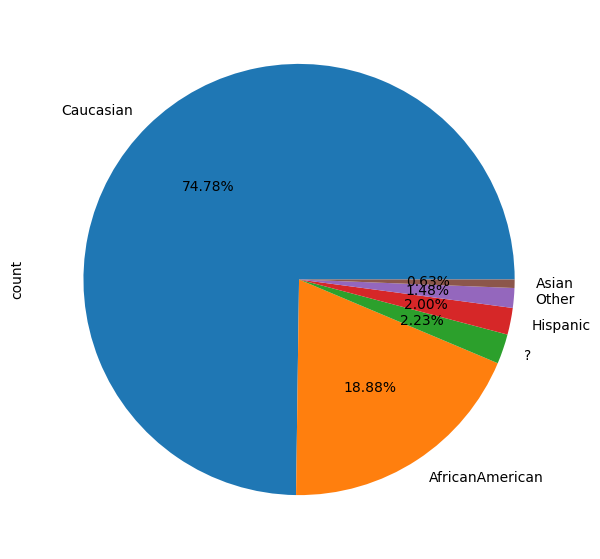

In [146]:
print(df['race'].value_counts())
df['race'].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(15,7))
plt.show()

In [147]:
df['race'] = df['race'].replace('?', np.nan)

# Drop rows where 'race' is NaN
df = df.dropna(subset=['race'])


In [148]:
df.shape

(99493, 45)

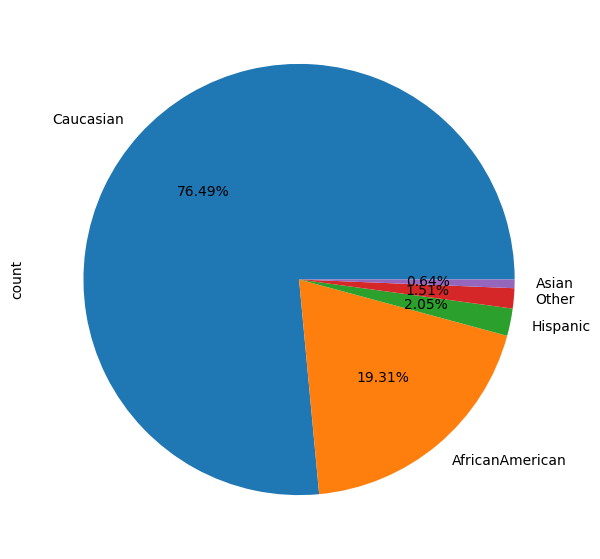

In [149]:
df['race'].value_counts().plot(kind='pie',autopct='%.2f%%',figsize=(15,7))
plt.show()

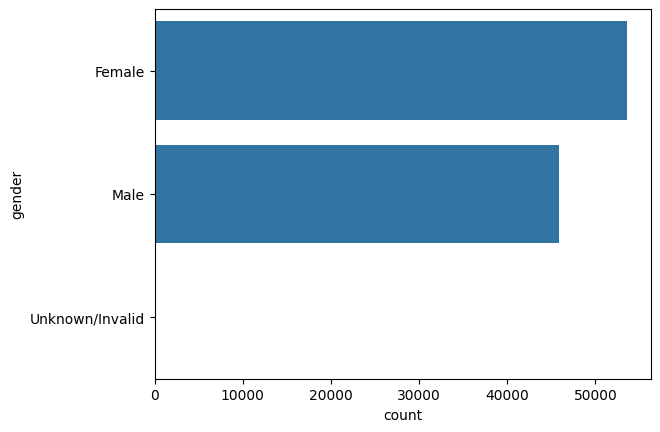

gender
Female             53575
Male               45917
Unknown/Invalid        1
Name: count, dtype: int64


In [150]:
sns.countplot(df.gender)
plt.show()
print(df.gender.value_counts())

In [151]:
df = df[df['gender'] != 'Unknown/Invalid']

In [152]:
df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

C:\Users\ADVAIT\AppData\Local\Temp\ipykernel_12960\2444561731.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})


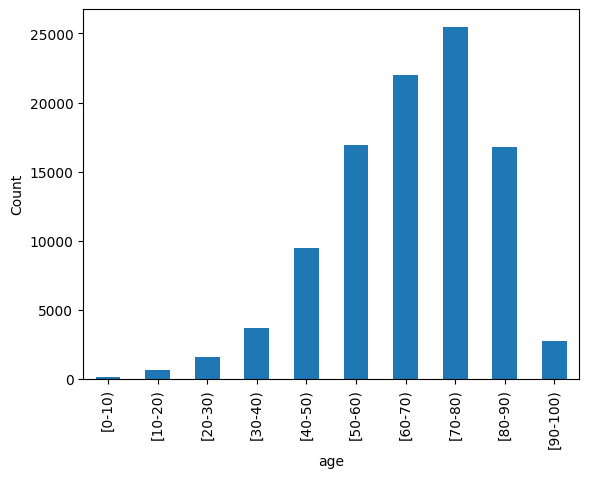

In [153]:
df.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

The age here range from 0 to 100 yrs.

The population falling in the range of 50 to 90 yrs are mostly present in this dataset.

Modify age column

In [154]:
df['age'] = df['age'].map({'[70-80)': 75,
                                       '[60-70)': 65,
                                       '[80-90)': 85,
                                       '[50-60)': 55,
                                       '[40-50)':45,
                                       '[30-40)': 35,
                                       '[90-100)':95,
                                       '[20-30)':25,
                                       '[10-20)':15,
                                       '[0-10)': 5})
df['age'].value_counts()

age
75    25468
65    21988
55    16895
85    16800
45     9465
35     3699
95     2724
25     1611
15      682
5       160
Name: count, dtype: int64

In [155]:
df.admission_type_id.nunique()

8

There are 8 unique values ranging from 1 to 8:  
1 Emergency  
2 Urgent  
3 Elective  
4 Newborn  
5 Not Available  
6 NULL  
7 Trauma Center  
8 Not Mapped  

In [156]:
df['admission_type_id']=df['admission_type_id'].replace({1:'Emergency',2:'Emergency',7:'Emergency', 5:'Not Available', 6:'Not Available', 8:'Not Available', 3:'Elective',4:'Newborn'})

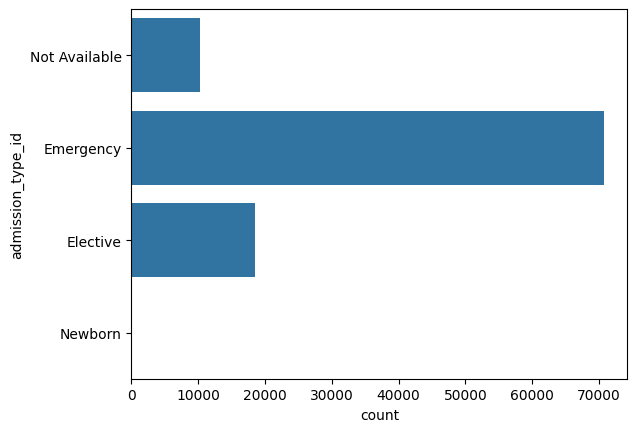

In [157]:
sns.countplot(df['admission_type_id'])
plt.show()

In [158]:
df[df['admission_type_id']== 'Newborn'][['gender','age','admission_type_id']]

,gender,age,admission_type_id
2043,1,55,Newborn
2203,1,85,Newborn
2461,1,75,Newborn
4823,0,65,Newborn
35877,1,65,Newborn
47548,1,45,Newborn
48711,0,75,Newborn
80354,0,5,Newborn
87714,1,65,Newborn
100721,1,85,Newborn


In the dataset, the Newborn admission type id is incorrectly assigned. So, we drop the Newborn from admission_type_id.

In [159]:
df=df[df['admission_type_id']!='Newborn']

In [160]:
df.admission_type_id.value_counts()

admission_type_id
Emergency        70706
Elective         18507
Not Available    10269
Name: count, dtype: int64

**discharge_disposition_id description**  
1 Discharged to home  
2 Discharged/transferred to another short term hospital  
3 Discharged/transferred to SNF(skilled nursing facility)  
4 Discharged/transferred to ICF(intermediate care facility)  
5 Discharged/transferred to another type of inpatient care institution  
6 Discharged/transferred to home with home health service  
7 Left AMA(Against Medical Advice.)  
8 Discharged/transferred to home under care of Home IV provider  
9 Admitted as an inpatient to this hospital  
10 Neonate discharged to another hospital for neonatal aftercare  
11 Expired  
12 Still patient or expected to return for outpatient services  
13 Hospice / home  
14 Hospice / medical facility  
15 Discharged/transferred within this institution to Medicare approved swing bed  
16 Discharged/transferred/referred another institution for outpatient services  
17 Discharged/transferred/referred to this institution for outpatient services  
18 NULL   
19 Expired at home. Medicaid only, hospice.      
20 Expired in a medical facility. Medicaid only, hospice.    
21 Expired, place unknown. Medicaid only, hospice.    
22 Discharged/transferred to another rehab fac including rehab units of a hospital .      
23 Discharged/transferred to a long term care hospital.      
24 Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.   
25 Not Mapped   
26 Unknown/Invalid      
27 Discharged/transferred to a federal health care facility.   
28 Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital      
29 Discharged/transferred to a Critical Access Hospital (CAH).  
30 Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere 

In [161]:
df['discharge_disposition_id']=df['discharge_disposition_id'].replace({1:'Discharged to home',2:'Transferred to another medical facility',3:'Transferred to another medical facility',                           4:'Transferred to another medical facility',
5:'Transferred to another medical facility',
16:'Transferred to another medical facility',
22:'Transferred to another medical facility',
23:'Transferred to another medical facility',
24:'Transferred to another medical facility',
27:'Transferred to another medical facility',
28:'Transferred to another medical facility',
29:'Transferred to another medical facility',
30:'Transferred to another medical facility',                            
6:'Discharged to home with home health service',
8:'Discharged to home with home health service',
7:'Left AMA',
9:'Still patient/referred to this institution',
12:'Still patient/referred to this institution',
15:'Still patient/referred to this institution',
17:'Still patient/referred to this institution',
10:'Neonate discharged',
11:'Expired',
19:'Expired',
20:'Expired',
21:'Expired',
13:'Hospice',
14:'Hospice',
18:'Not Available',
25:'Not Available',
26:'Not Available'})

In [162]:
df.discharge_disposition_id.value_counts()

discharge_disposition_id
Discharged to home                             58761
Transferred to another medical facility        20172
Discharged to home with home health service    12801
Not Available                                   4646
Expired                                         1618
Hospice                                          766
Left AMA                                         611
Still patient/referred to this institution       101
Neonate discharged                                 6
Name: count, dtype: int64

In [163]:
df=df[df['discharge_disposition_id']!='Expired']
df=df[df['discharge_disposition_id']!='Neonate discharged']
df=df[df['discharge_disposition_id']!='Hospice']

In [164]:
df.admission_source_id.value_counts(sort=False)

admission_source_id
1     28456
7     55007
2      1021
4      2918
5       800
20      158
6      1964
3       185
17     6489
8        15
9        54
10        7
22       12
14        1
11        2
25        2
13        1
Name: count, dtype: int64

1 Physician Referral  
2 Clinic Referral   
3 HMO Referral(Health Maintenance Organization)  
4 Transfer from a hospital  
5 Transfer from a Skilled Nursing Facility (SNF)  
6 Transfer from another health care facility  
7 Emergency Room  
8 Court/Law Enforcement  
9 Not Available  
10 Transfer from critial access hospital  
11 Normal Delivery  
12 Premature Delivery  
13 Sick Baby  
14 Extramural Birth  
15 Not Available  
17 NULL   
18 Transfer From Another Home Health Agency  
19 Readmission to Same Home Health Agency  
20 Not Mapped  
21 Unknown/Invalid  
22 Transfer from hospital inpt/same fac reslt in a sep claim   
23 Born inside this hospital  
24 Born outside this hospital  
25 Transfer from Ambulatory Surgery Center  
26 Transfer from Hospice

In [165]:
df['admission_source_id']=df['admission_source_id'].replace({1:'Referral',
                                   2:'Referral',
                                   3:'Referral',
                                   4:'Transferred from another health care facility',
                                   5:'Transferred from another health care facility',
                                   6:'Transferred from another health care facility',
                                   8:'Emergency',                                    
                                   10:'Transferred from another health care facility',
                                   18:'Transferred from another health care facility',
                                   19:'Transferred from another health care facility',
                                   25:'Transferred from another health care facility',
                                   26:'Transferred from another health care facility',
                                   7:'Emergency',
                                   9:'Not Available',
                                   15:'Not Available',
                                   17:'Not Available',
                                   20:'Not Available',
                                   21:'Not Available',
                                   11:'Delivery',
                                   12:'Delivery',
                                   13:'Delivery',
                                   14:'Delivery',
                                   23:'Delivery',
                                   22:"Transferred from another health care facility",                                    
                                   24:'Delivery'})

In [166]:
df.admission_source_id.value_counts()

admission_source_id
Emergency                                        55022
Referral                                         29662
Not Available                                     6701
Transferred from another health care facility     5703
Delivery                                             4
Name: count, dtype: int64

In [167]:
df[df['admission_source_id']=='Delivery'][['gender','age','admission_source_id']]

,gender,age,admission_source_id
83432,0,75,Delivery
83510,0,25,Delivery
85588,0,75,Delivery
97384,1,75,Delivery


In [168]:
df=df[df['admission_source_id']!='Delivery']

In [169]:
df = df.reset_index(drop = True )

In [170]:
df[df['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

admission_source_id
Emergency                                        52268
Referral                                         11094
Transferred from another health care facility     4422
Not Available                                      981
Name: count, dtype: int64

In [171]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not Available' and df.loc[i, 'admission_type_id'] == 'Emergency':
        df.loc[i, 'admission_source_id'] = 'Emergency'

In [172]:
df[df['admission_type_id']=='Emergency']['admission_source_id'].value_counts()

admission_source_id
Emergency                                        53249
Referral                                         11094
Transferred from another health care facility     4422
Name: count, dtype: int64

In [173]:
df[df['admission_type_id']=='Elective']['admission_source_id'].value_counts()

admission_source_id
Referral                                         16128
Transferred from another health care facility     1211
Emergency                                          912
Not Available                                       59
Name: count, dtype: int64

In [174]:
for i in range(df.shape[0]):
    if df.loc[i, 'admission_source_id'] == 'Not Available' and df.loc[i, 'admission_type_id'] == 'Elective':
        df.loc[i, 'admission_source_id'] = 'Referral'

In [175]:
df[df['admission_type_id']=='Elective']['admission_source_id'].value_counts()

admission_source_id
Referral                                         16187
Transferred from another health care facility     1211
Emergency                                          912
Name: count, dtype: int64

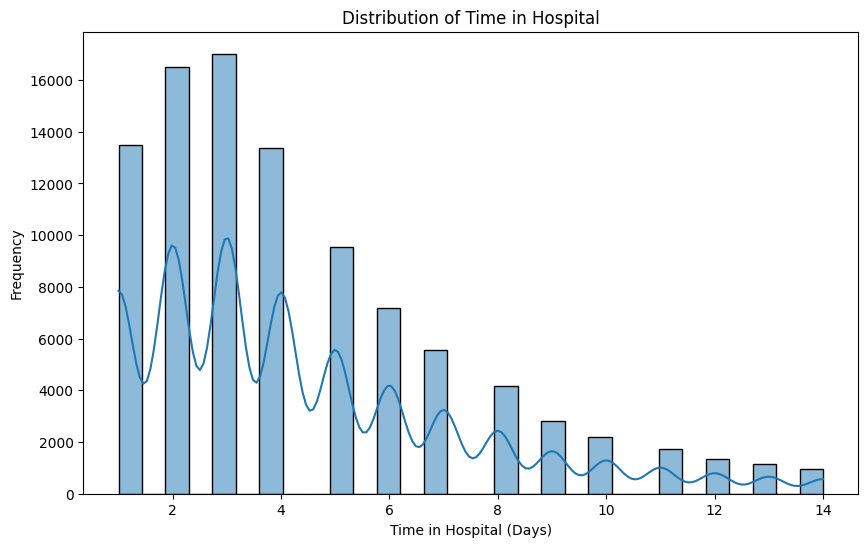

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(df['time_in_hospital'], bins=30, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Frequency')
plt.show()

In [177]:
print('The number of lab tests a patient has undergone can range from',df.num_lab_procedures.min(),'to',df.num_lab_procedures.max())


The number of lab tests a patient has undergone can range from 1 to 132


In [178]:
df.num_procedures.value_counts()

num_procedures
0    44532
1    19843
2    12140
3     9032
6     4675
4     3970
5     2896
Name: count, dtype: int64

In [179]:
print('The number of medications range from a minimum of',df.num_medications.min(),'to maximum of',df.num_medications.max())

The number of medications range from a minimum of 1 to maximum of 81


In [180]:
df = df.reset_index(drop = True )

In [181]:
diag_cols = ['diag_1','diag_2','diag_3']

In [182]:
ord('E'), ord('V')

(69, 86)

In [183]:
for i in diag_cols:
    for j in range(len(df[i])):
        if str(df.loc[j, i])[:3] == '250':
            df.loc[j, i] = 'Diabetes'
        elif ord(str(df.loc[j, i])[0]) in range(69, 87):
            df.loc[j, i] = 'External causes of injury'
        elif df.loc[j, i] == '?':
            df.loc[j, i] = 'Missing'
        else:
            x = float(df.loc[j, i])
            if x in range(390, 460) or x == 785:
                df.loc[j, i] = 'Circulatory'
            elif x in range(460, 520) or x == 786:
                df.loc[j, i] = 'Respiratory'
            elif x in range(520, 580) or x == 787:
                df.loc[j, i] = 'Digestive'
            elif x in range(800, 1000):
                df.loc[j, i] = 'Injury and Poisoning'
            elif x in range(710, 740):
                df.loc[j, i] = 'Musculoskeletal System and Connective Tissue'
            elif x in range(580, 630) or x == 788:
                df.loc[j, i] = 'Genitourinary'
            elif x in range(140, 230):
                df.loc[j, i] = 'Neoplasms'
            elif x in [780, 781, 784] or x in range(790, 800):
                df.loc[j, i] = 'Other Symptoms'
            elif x in range(240, 280):
                df.loc[j, i] = 'Endocrine, Nutritional, Metabolic, Immunity'
            elif x in range(680, 710) or x == 782:
                df.loc[j, i] = 'Skin and Subcutaneous Tissue'
            elif x in range(1, 140):
                df.loc[j, i] = 'Infectious and Parasitic'
            elif x in range(290, 320):
                df.loc[j, i] = 'Mental Disorders'
            elif x in range(280, 290):
                df.loc[j, i] = 'Blood and Blood-Forming Organs'
            elif x in range(320, 360):
                df.loc[j, i] = 'Nervous'
            elif x in range(630, 680):
                df.loc[j, i] = 'Pregnancy, Childbirth'
            elif x in range(360, 390):
                df.loc[j, i] = 'Sense Organs'
            else:
                df.loc[j, i] = 'Congenital Anomalies'

In [184]:
for i in range(len(df['diag_2'])):
    if df.loc[i, 'diag_2'] == 'Missing':
        if df.loc[i, 'diag_1'] != 'Missing':
            df.loc[i, 'diag_2'] = 'Not Required'

In [185]:
for i in range(len(df['diag_3'])):
    if df.loc[i, 'diag_3'] == 'Missing':
        if df.loc[i, 'diag_2'] == 'Not Required' or df.loc[i, 'diag_2'] != 'Missing':
            df.loc[i, 'diag_3'] = 'Not Required'

In [186]:
df1 = pd.DataFrame(df['diag_1'].value_counts())
df2 = df1.merge(pd.DataFrame(df['diag_2'].value_counts()), how = 'outer', left_index = True, right_index = True)
df2.merge(pd.DataFrame(df['diag_3'].value_counts()), how = 'outer', left_index = True, right_index = True)

,count_x,count_y,count
Blood and Blood-Forming Organs,1078.0,2801.0,2402.0
Circulatory,29004.0,30465.0,28956.0
Congenital Anomalies,791.0,478.0,467.0
Diabetes,8471.0,12392.0,16540.0
Digestive,9154.0,3994.0,3781.0
"Endocrine, Nutritional, Metabolic, Immunity",2553.0,7899.0,8726.0
External causes of injury,1595.0,2484.0,4938.0
Genitourinary,4912.0,8002.0,6289.0
Infectious and Parasitic,2487.0,1816.0,1773.0
Injury and Poisoning,6699.0,2302.0,1846.0


In [187]:
len(df[df['diag_1'] == 'Missing'])

18

In [188]:
df = df[df['diag_1'] != 'Missing']

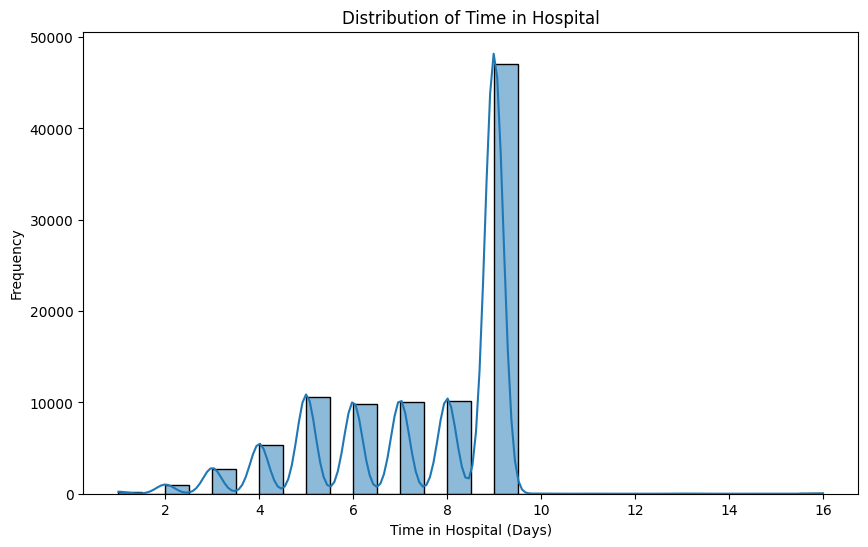

In [189]:
plt.figure(figsize=(10, 6))
sns.histplot(df['number_diagnoses'], bins=30, kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Time in Hospital')
plt.xlabel('Time in Hospital (Days)')
plt.ylabel('Frequency')
plt.show()

The number of diagonses entered into the system range from 1 to 16.

In [190]:
df.max_glu_serum.value_counts()

max_glu_serum
Norm    2517
>200    1397
>300    1178
Name: count, dtype: int64

In [191]:
df.A1Cresult.value_counts()

A1Cresult
>8      7881
Norm    4836
>7      3691
Name: count, dtype: int64

In [192]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

for i in meds:
       print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No']
metformin-pioglitazone ['No' 'Steady']


In [193]:
df.drop(['examide', 'citoglipton','metformin-rosiglitazone'], axis = 1, inplace = True)

In [194]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [195]:
# The medicines can be encoded as below 
for i in meds:
    df[i] = df[i].replace({'No' : -2,
                           'Down' : -1,
                           'Steady' : 0,
                           'Up' : 1})

C:\Users\ADVAIT\AppData\Local\Temp\ipykernel_12960\273118523.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i] = df[i].replace({'No' : -2,


In [196]:
for i in meds:
    df[i] = df[i].astype('int64')

In [197]:
df.change.value_counts()

change
No    52046
Ch    45024
Name: count, dtype: int64

In [198]:
df['change'] = df['change'].replace({'No' : 0, 'Ch' : 1})

C:\Users\ADVAIT\AppData\Local\Temp\ipykernel_12960\3562970777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace({'No' : 0, 'Ch' : 1})


In [199]:
df.diabetesMed.value_counts()

diabetesMed
Yes    74842
No     22228
Name: count, dtype: int64

In [200]:
df['diabetesMed'] = df['diabetesMed'].replace({'Yes' : 1, 'No' : 0})

C:\Users\ADVAIT\AppData\Local\Temp\ipykernel_12960\4205708794.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetesMed'] = df['diabetesMed'].replace({'Yes' : 1, 'No' : 0})


In [201]:
df.readmitted.value_counts()

readmitted
NO     50995
>30    34955
<30    11120
Name: count, dtype: int64

In [202]:
df['readmitted'] = df['readmitted'].replace('>30', 'NO')
df['readmitted']= df['readmitted'].replace( {'NO': 0, '<30': 1} ).astype(int)

C:\Users\ADVAIT\AppData\Local\Temp\ipykernel_12960\1596671788.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted']= df['readmitted'].replace( {'NO': 0, '<30': 1} ).astype(int)


In [203]:
df.reset_index(drop = True, inplace = True)

## Feature Engineering

**1. Preceding year visits:**

In [204]:
df['preceding_year_visits']=df['number_outpatient']+df['number_emergency']+df['number_inpatient']

In [205]:
df = df.drop(columns=['number_outpatient', 'number_emergency','number_inpatient'])

**2. Number of Medicines Changes**

In [206]:
df['number_changes'] = np.nan
for i in range(len(df)):
    n = 0
    for j in meds:
        if df.loc[i, j] == -1 or df.loc[i, j] == 1:
            n += 1
    df.loc[i, 'number_changes'] = n

In [207]:
df['number_changes'].value_counts()

number_changes
0.0    70599
1.0    25081
2.0     1279
3.0      106
4.0        5
Name: count, dtype: int64

**3. Number of diabetic medicine**

In [208]:
df['number_diab_meds'] = np.nan
for i in range(len(df)):
    n = 0
    for j in meds:
        if df.loc[i, j] != -2:
            n += 1
    df.loc[i, 'number_diab_meds'] = n
df.number_diab_meds=df.number_diab_meds.astype('int64')
df['number_diab_meds'].value_counts()

number_diab_meds
1    44940
0    22228
2    21038
3     7504
4     1298
5       57
6        5
Name: count, dtype: int64

**4. Insulin_treatment**

In [209]:
df['insulin_treatment'] = np.nan

In [210]:
for i in range(len(df)):
    if df.loc[i, 'insulin'] != -2 and df.loc[i, 'number_diab_meds'] == 1:
        df.loc[i, 'insulin_treatment'] = 'insulin_only'
    elif df.loc[i, 'insulin'] != -2 and df.loc[i, 'number_diab_meds'] > 1:
        df.loc[i, 'insulin_treatment'] = 'insulin_combo'
    elif df.loc[i, 'insulin'] == -2 and df.loc[i, 'number_diab_meds'] == 0:
        df.loc[i, 'insulin_treatment'] = 'no_med'
    else:
        df.loc[i, 'insulin_treatment'] = 'other_meds'
df['insulin_treatment'].value_counts()

C:\Users\ADVAIT\AppData\Local\Temp\ipykernel_12960\1363489317.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'no_med' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'insulin_treatment'] = 'no_med'


insulin_treatment
insulin_only     29118
other_meds       23259
insulin_combo    22465
no_med           22228
Name: count, dtype: int64

In [211]:
# number_diab_meds was inly created to make the column insulin treatment, Hence we drop it
df=df.drop('number_diab_meds',axis=1)
df.reset_index(drop = True, inplace = True)

## Statistical tests

In [212]:
# Numerical features
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_diagnoses','preceding_year_visits', 'number_changes']

In [213]:
# Categorical features
cat_cols = ['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 
            'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
            'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
            'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
            'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 
            'change', 'diabetesMed', 'insulin_treatment']

In [214]:
df.shape

(97070, 42)

In [215]:
len(num_cols)+len(cat_cols)

42

**Chi Square for categorical v/s categorical and one way anova for categorical v/s numerical**  

To see if the features are significant w.r.t to the target variable (readmitted)

In [216]:
#Statistical Tests (Chi Square and Anova)

p_val = []
sig = []
for i in df.columns:
    if i in num_cols:
        stat, p = stats.f_oneway(df[df['readmitted'] == 0][i], df[df['readmitted'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['readmitted'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})

stats_df.sort_values(by='p_value',ascending = True)

,columns,p_value,significance
39,preceding_year_visits,0.000000e+00,Significant
38,readmitted,0.000000e+00,Significant
4,discharge_disposition_id,1.002865e-175,Significant
13,number_diagnoses,1.181113e-62,Significant
6,time_in_hospital,6.893070e-49,Significant
31,insulin,1.450024e-43,Significant
9,num_medications,1.128847e-39,Significant
41,insulin_treatment,1.750135e-39,Significant
40,number_changes,3.627420e-30,Significant
12,diag_3,5.426864e-30,Significant


In [217]:
sig_cols = stats_df[stats_df['significance'] == 'Significant']['columns'].reset_index(drop = True)
insig_cols = stats_df[stats_df['significance'] == 'Insignificant']['columns'].reset_index(drop = True)
print('Statiscally significant features are :','\n')
print(sig_cols)

Statiscally significant features are : 

0                          age
1            admission_type_id
2     discharge_disposition_id
3          admission_source_id
4             time_in_hospital
5           num_lab_procedures
6               num_procedures
7              num_medications
8                       diag_1
9                       diag_2
10                      diag_3
11            number_diagnoses
12               max_glu_serum
13                   metformin
14                 repaglinide
15                 glimepiride
16                   glipizide
17                pioglitazone
18                     insulin
19                      change
20                 diabetesMed
21                  readmitted
22       preceding_year_visits
23              number_changes
24           insulin_treatment
Name: columns, dtype: object


In [218]:
#statistically insignificant meds

insignificant_meds = ['nateglinide','chlorpropamide','acetohexamide','tolbutamide','acarbose','miglitol',
                      'troglitazone','tolazamide','glyburide-metformin','glipizide-metformin',
                      'glimepiride-pioglitazone','metformin-pioglitazone','glyburide','rosiglitazone']

**looking at meds seperately**

In [219]:
meds = ['metformin','repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone']

len(meds)

20

In [220]:
# Medicines given to less than 1% of the population i.e. less than 485 people
less_counts = []

for i in meds:
    print(df[i].value_counts(), '\n')

    vc = df[i].value_counts().values
    if vc[1:].sum() / vc[0] < 0.01:
        less_counts.append(i)

metformin
-2    77697
 0    17777
 1     1035
-1      561
Name: count, dtype: int64 

repaglinide
-2    95562
 0     1359
 1      106
-1       43
Name: count, dtype: int64 

nateglinide
-2    96389
 0      647
 1       23
-1       11
Name: count, dtype: int64 

chlorpropamide
-2    96987
 0       76
 1        6
-1        1
Name: count, dtype: int64 

glimepiride
-2    92105
 0     4466
 1      316
-1      183
Name: count, dtype: int64 

acetohexamide
-2    97069
 0        1
Name: count, dtype: int64 

glipizide
-2    84827
 0    10963
 1      748
-1      532
Name: count, dtype: int64 

glyburide
-2    86820
 0     8925
 1      783
-1      542
Name: count, dtype: int64 

tolbutamide
-2    97050
 0       20
Name: count, dtype: int64 

pioglitazone
-2    89970
 0     6758
 1      226
-1      116
Name: count, dtype: int64 

rosiglitazone
-2    90907
 0     5913
 1      168
-1       82
Name: count, dtype: int64 

acarbose
-2    96771
 0      286
 1       10
-1        3
Name: count, dtype: i

In [221]:
less_counts, len(less_counts) 

(['nateglinide',
  'chlorpropamide',
  'acetohexamide',
  'tolbutamide',
  'acarbose',
  'miglitol',
  'troglitazone',
  'tolazamide',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-pioglitazone'],
 12)

We can remove these medicines because they are given to less than 1% of the population and they are statistically insignificat as well.

In [222]:
df = df.drop(['nateglinide','chlorpropamide','acetohexamide',  'tolbutamide',
              'acarbose', 'miglitol',  'troglitazone',  'tolazamide',
              'glyburide-metformin',  'glipizide-metformin',
              'glimepiride-pioglitazone','metformin-pioglitazone'],axis=1)

Change and number change are depicting the same information and both of them are significant,we are dropping one of it based on the fact that number of change is a bit more significant than change.(lessser the pvalue better it is

In [223]:
df = df.drop(['change'],axis=1)

In [224]:
df['admission_type_id'].value_counts()

admission_type_id
Emergency        68753
Elective         18305
Not Available    10012
Name: count, dtype: int64

In [225]:
df['admission_source_id'].value_counts()

admission_source_id
Emergency                                        55994
Referral                                         29712
Transferred from another health care facility     5703
Not Available                                     5661
Name: count, dtype: int64

admission sorce id and admission type id are similar as admission type id's details are present in admission source id so we can drop admission type id and just keep admission source id

In [226]:
df = df.drop(['admission_type_id'],axis=1)

In [227]:
df.shape

(97070, 28)

In [228]:
df.columns

Index(['race', 'gender', 'age', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'diabetesMed', 'readmitted',
       'preceding_year_visits', 'number_changes', 'insulin_treatment'],
      dtype='object')

## Multi-Collinearity

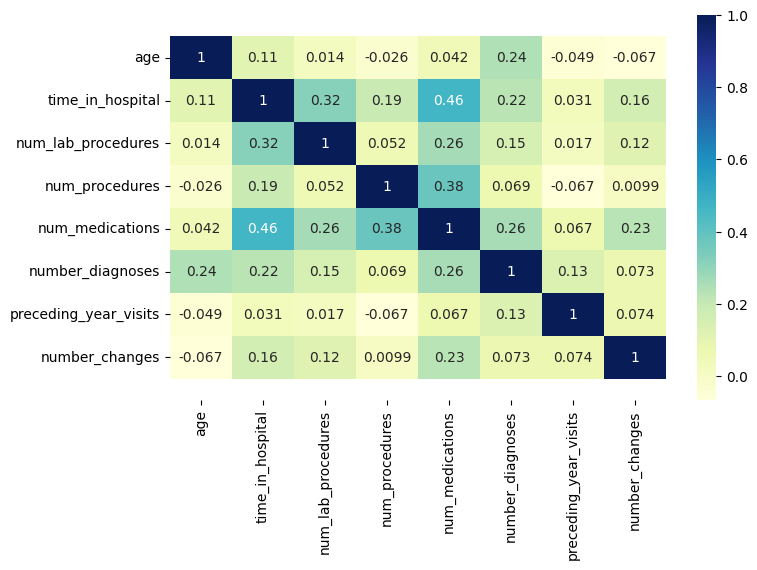

In [229]:
plt.figure(figsize=(8,5))
corr=df[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
b,t=plt.ylim()
plt.ylim(b+0.5,t-0.5)
plt.show()

In [230]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df[num_cols].values,i) for i in range(df[num_cols].shape[1])]
vif['feature']=df[num_cols].columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
5,15.085635,number_diagnoses
0,12.141439,age
4,7.651632,num_medications
2,6.101781,num_lab_procedures
1,4.344960,time_in_hospital
3,1.926622,num_procedures
7,1.451683,number_changes
6,1.320692,preceding_year_visits


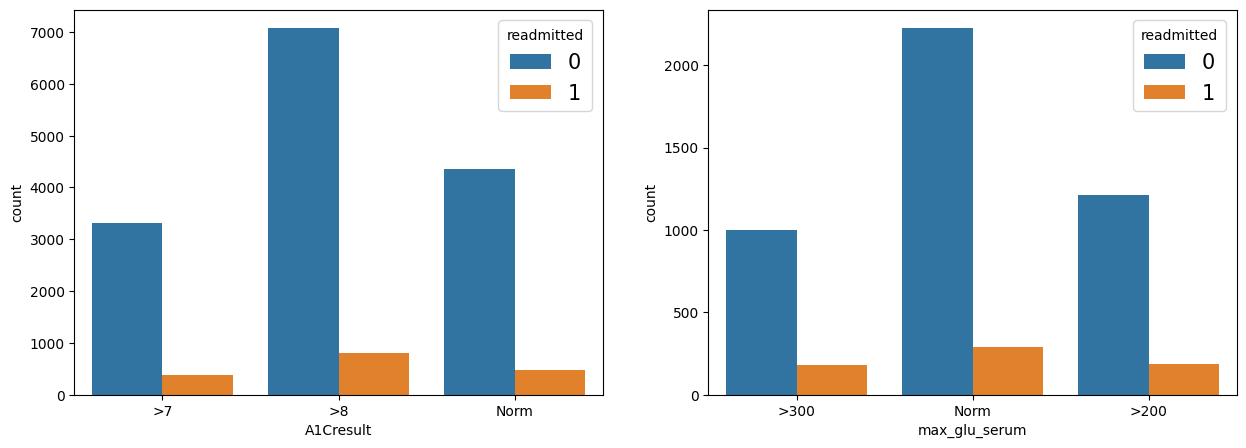

In [231]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

# Loop through the columns and create countplots
j = 0
for i in ['A1Cresult', 'max_glu_serum']:    
    sns.countplot(data=df, x=i, hue='readmitted', ax=ax[j]) 
    j += 1

# Display the plots
plt.show()

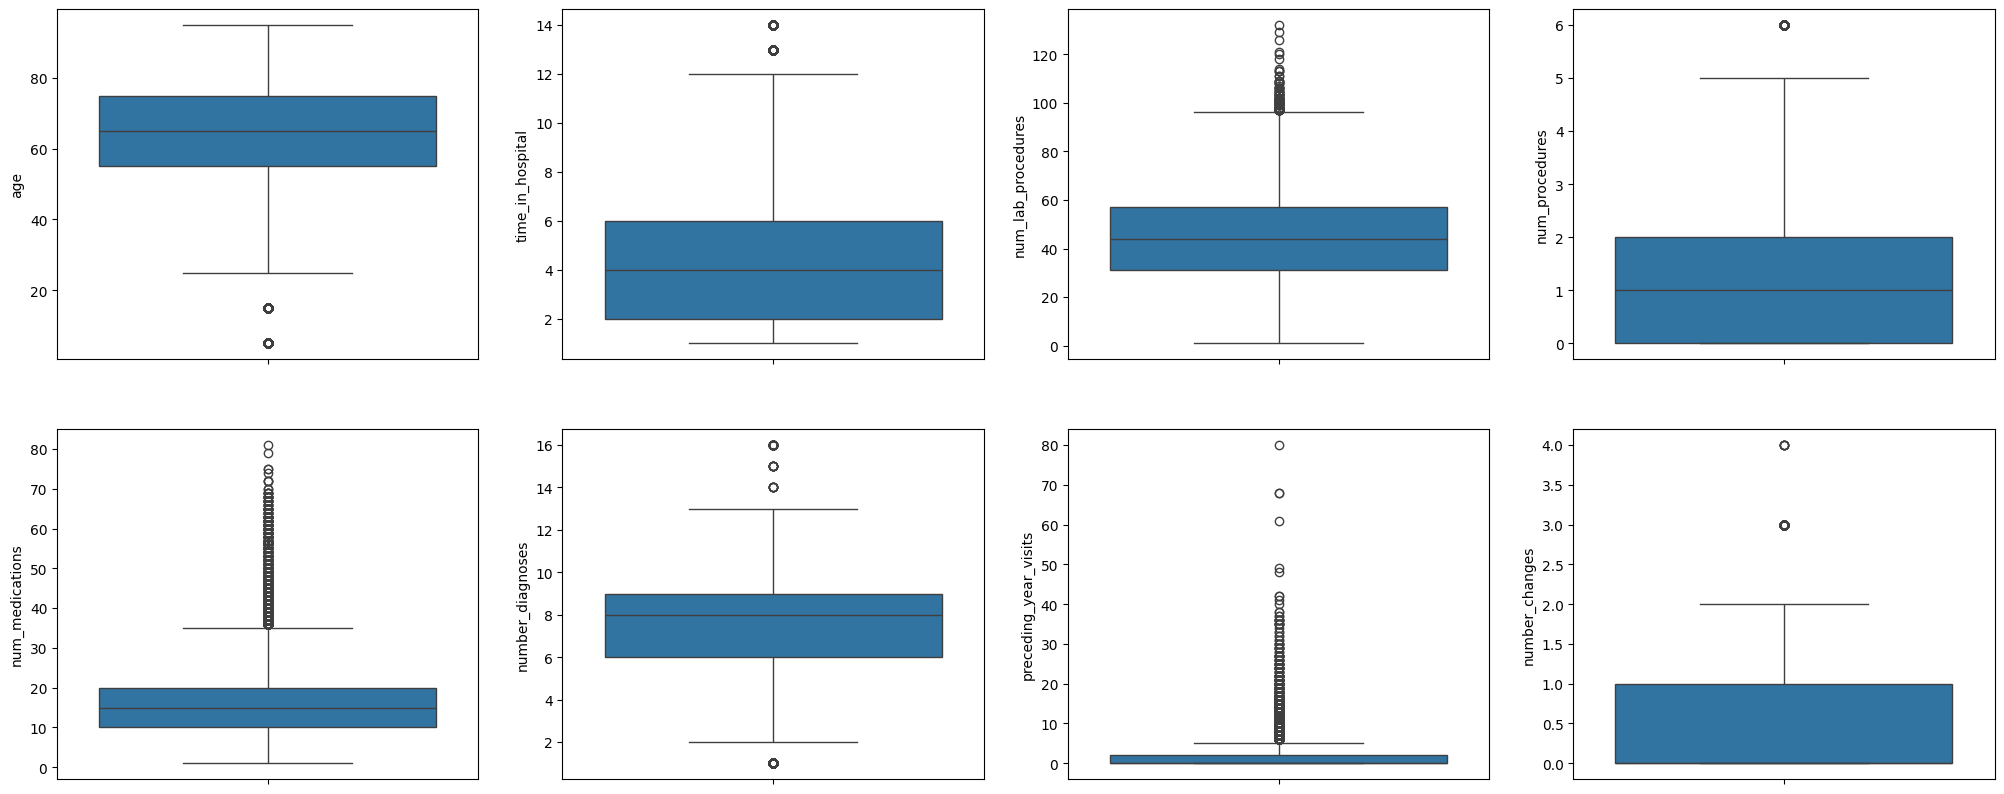

In [232]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
ax=ax.flatten()
j=0
for i in num_cols:    
    sns.boxplot(df[i],ax=ax[j]) 
    j=j+1
plt.show()

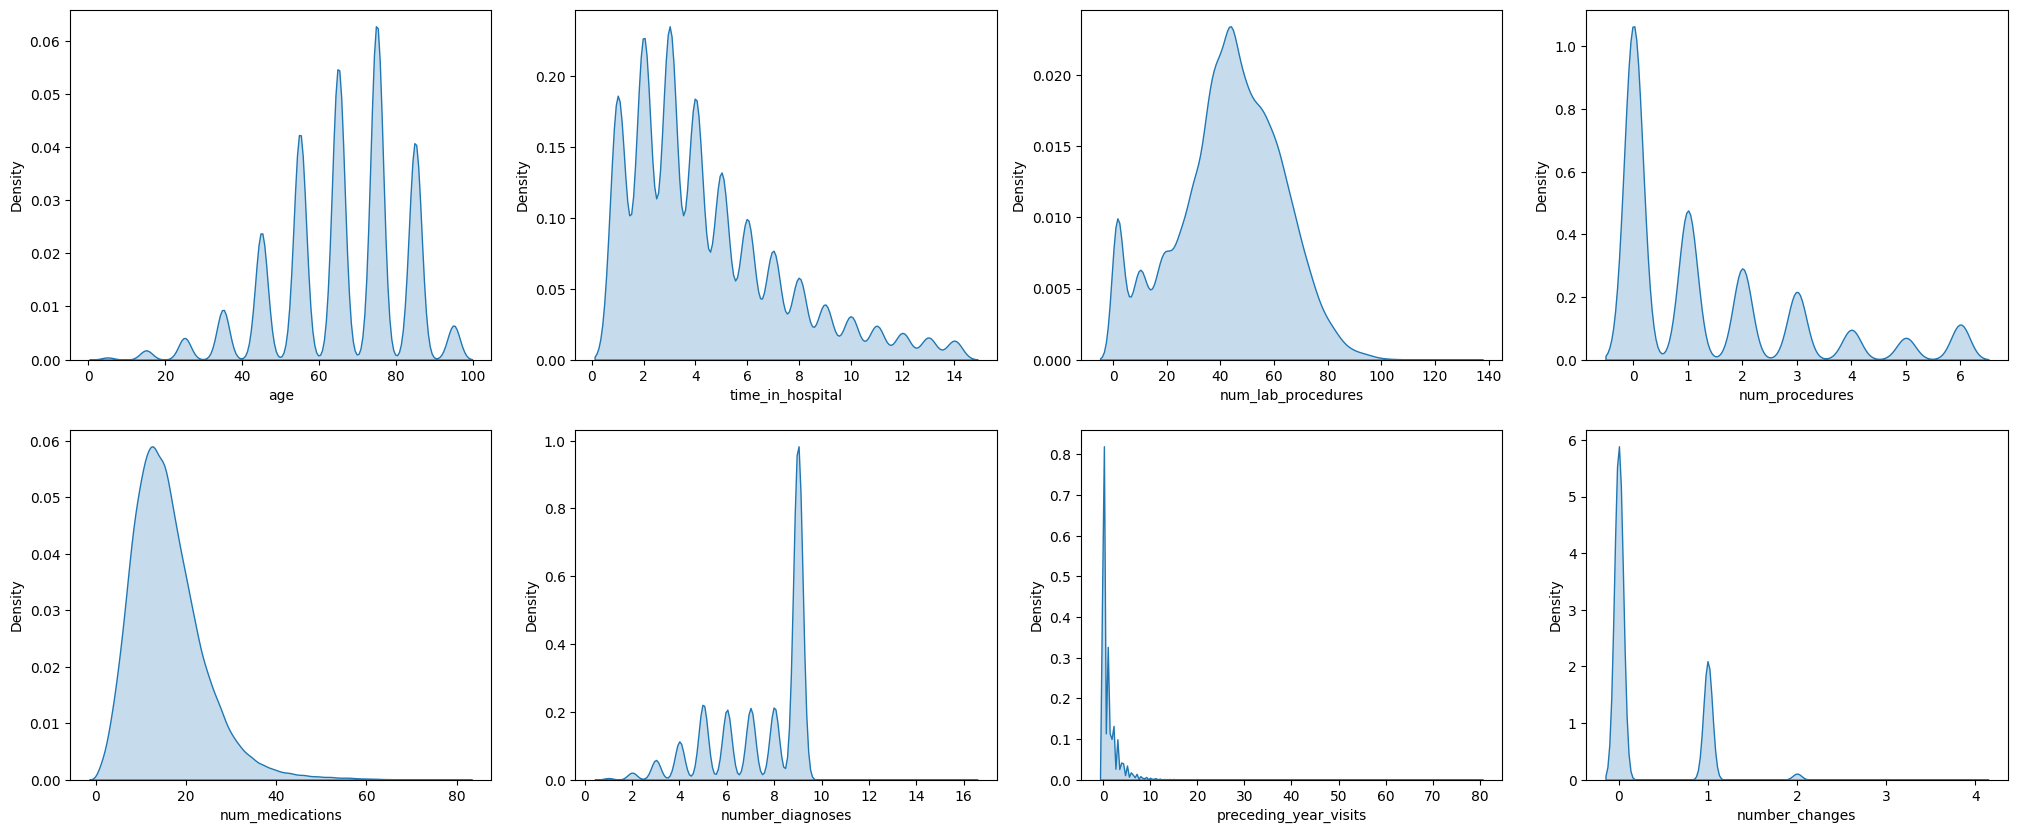

In [233]:
fig,ax=plt.subplots(2,4,figsize=(25,10))
ax=ax.flatten()
j=0
for i in num_cols:    
    sns.kdeplot(df[i],ax=ax[j],fill=True)
    plt.rc('legend', fontsize=15) 
    j=j+1
plt.show()

In [234]:
for i in num_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1

    UL = q3 + (1.5 * iqr)
    LL = q1 - (1.5 * iqr)
    print(i,df[(df[i]>UL) | (df[i]<LL)].count()[i])
    #print(X[(X[i]>UL) | (X[i]<LL)][i])

age 840
time_in_hospital 2103
num_lab_procedures 119
num_procedures 4675
num_medications 2382
number_diagnoses 266
preceding_year_visits 4299
number_changes 111


In [235]:
pt = PowerTransformer(method = 'yeo-johnson')
df_new=df.copy()
df_new[num_cols]=pd.DataFrame(pt.fit_transform(df_new[num_cols]), columns = num_cols)
skew_df = pd.DataFrame({"Skew_Before" : df[num_cols].skew(), "Skew_After" : df_new[num_cols].skew()})
skew_df

,Skew_Before,Skew_After
age,-0.625265,-0.119083
time_in_hospital,1.141139,0.012974
num_lab_procedures,-0.239703,-0.230143
num_procedures,1.320396,0.207424
num_medications,1.331329,0.019316
number_diagnoses,-0.885529,-0.154843
preceding_year_visits,5.327782,0.409350
number_changes,1.425972,1.021220


In [236]:
mm=MinMaxScaler()
df_new[num_cols]=pd.DataFrame(mm.fit_transform(df_new[num_cols]), columns = num_cols)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97070 entries, 0 to 97069
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      97070 non-null  object 
 1   gender                    97070 non-null  int64  
 2   age                       97070 non-null  int64  
 3   discharge_disposition_id  97070 non-null  object 
 4   admission_source_id       97070 non-null  object 
 5   time_in_hospital          97070 non-null  int64  
 6   num_lab_procedures        97070 non-null  int64  
 7   num_procedures            97070 non-null  int64  
 8   num_medications           97070 non-null  int64  
 9   diag_1                    97070 non-null  object 
 10  diag_2                    97070 non-null  object 
 11  diag_3                    97070 non-null  object 
 12  number_diagnoses          97070 non-null  int64  
 13  max_glu_serum             5092 non-null   object 
 14  A1Cres

In [238]:
X = df.drop('readmitted', axis =  1)
y = df['readmitted']

In [239]:
X_dum = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size = 0.3, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((67949, 93), (29121, 93))

In [240]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [241]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint as sp_randint
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import scipy.stats as stats
from sklearn.metrics import recall_score, f1_score, confusion_matrix, classification_report, accuracy_score,precision_score, roc_auc_score

In [242]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)[:, 1]
y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)[:, 1]

print("Train Accuracy Score:", accuracy_score(y_train, y_train_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Train Precision Score:", precision_score(y_train, y_train_pred))
print("Train Recall Score:", recall_score(y_train, y_train_pred))
print("Train ROC_AUC Score:", roc_auc_score(y_train, y_train_prob))
print()
print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision Score:", precision_score(y_test, y_test_pred))
print("Test Recall Score:", recall_score(y_test, y_test_pred))
print("Test ROC_AUC Score:", roc_auc_score(y_test, y_test_prob))

Train Accuracy Score: 0.9999264153997851
Train Confusion Matrix:
 [[60165     0]
 [    5  7779]] 

Train F1 Score: 0.9996787251815202
Train Precision Score: 1.0
Train Recall Score: 0.9993576567317575
Train ROC_AUC Score: 0.9999999989323639

Test Accuracy Score: 0.8856838707461969
Test Confusion Matrix:
 [[25782     3]
 [ 3326    10]] 

Test F1 Score: 0.005971931919976112
Test Precision Score: 0.7692307692307693
Test Recall Score: 0.002997601918465228
Test ROC_AUC Score: 0.634156746737572


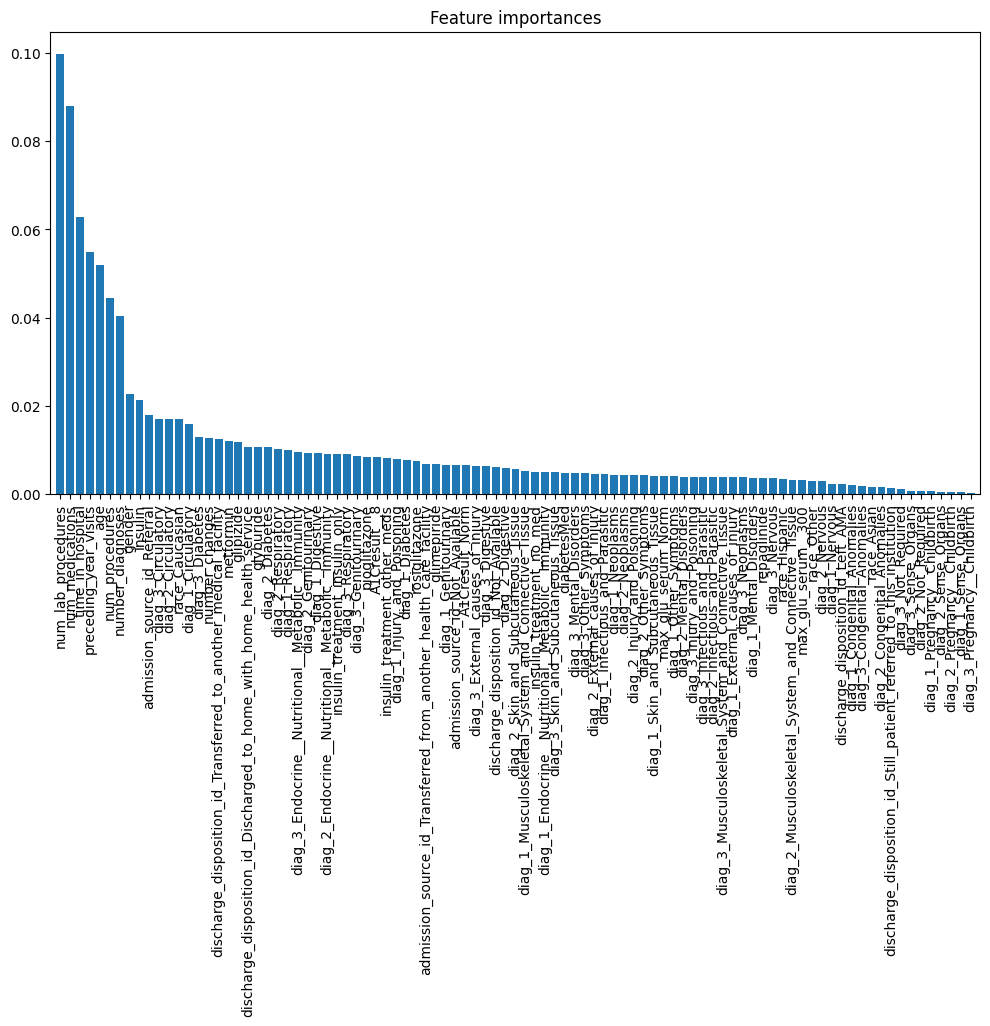

In [243]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

                                              Feature  Importance
0                                  num_lab_procedures    0.099881
1                                     num_medications    0.087977
2                                    time_in_hospital    0.062810
3                               preceding_year_visits    0.054962
4                                                 age    0.051936
5                                      num_procedures    0.044366
6                                    number_diagnoses    0.040406
7                                              gender    0.022644
8                                             insulin    0.021223
9                        admission_source_id_Referral    0.017785
10                                 diag_3_Circulatory    0.017005
11                                 diag_2_Circulatory    0.016920
12                                     race_Caucasian    0.016876
13                                 diag_1_Circulatory    0.015744
14        

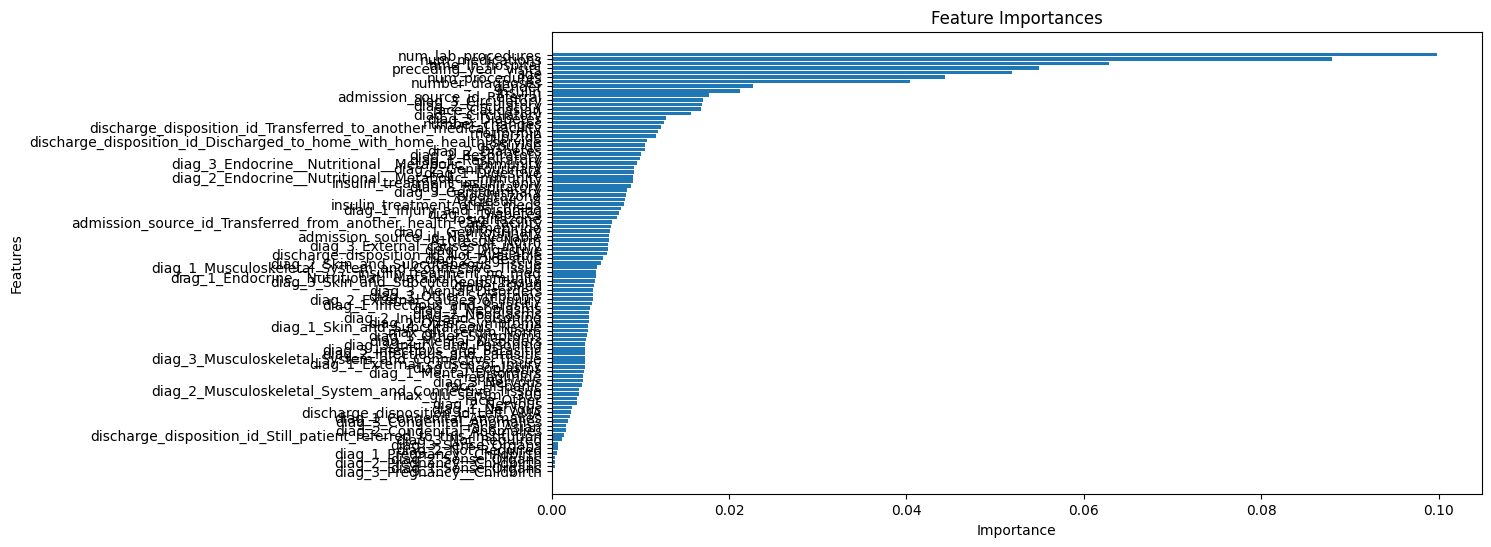

In [244]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame to hold feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[indices],
    'Importance': importances[indices]
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Optionally, you can save this DataFrame to a CSV file
feature_importance_df.to_csv('feature_importances.csv', index=False)

# Plot the feature importances again with a cleaner layout
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

In [245]:
# Get top N features
top_n = 10
top_features = feature_importance_df.head(top_n)
print(top_features)


                        Feature  Importance
0            num_lab_procedures    0.099881
1               num_medications    0.087977
2              time_in_hospital    0.062810
3         preceding_year_visits    0.054962
4                           age    0.051936
5                num_procedures    0.044366
6              number_diagnoses    0.040406
7                        gender    0.022644
8                       insulin    0.021223
9  admission_source_id_Referral    0.017785


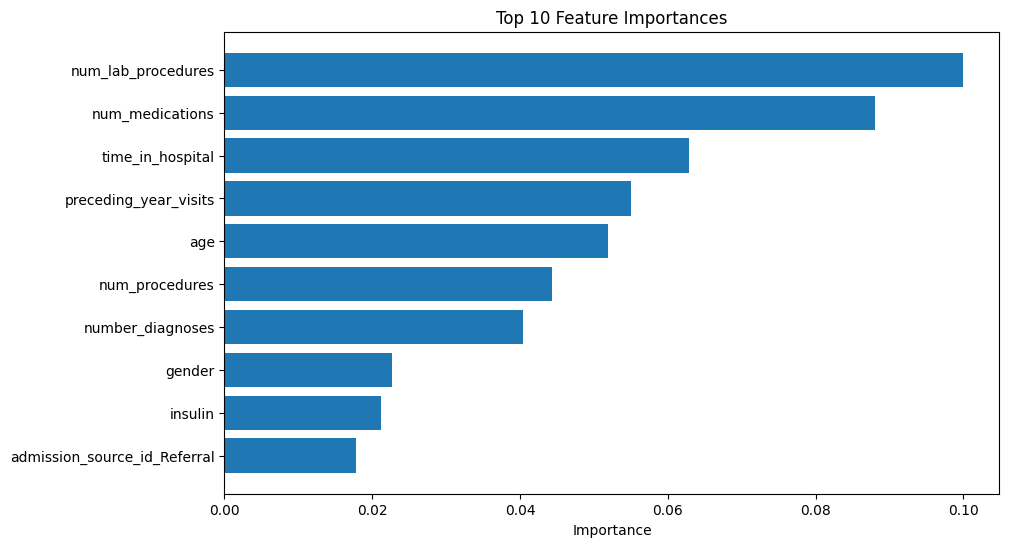

In [246]:
# Plot top features
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importances")
plt.barh(top_features['Feature'], top_features['Importance'], align='center')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


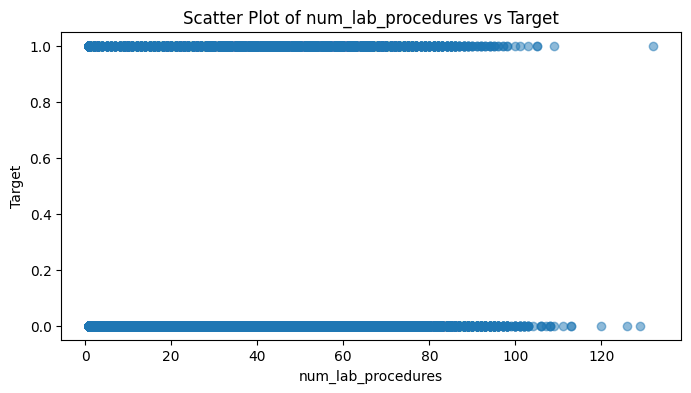

In [247]:
# Example: Scatter plot for the first important feature
plt.figure(figsize=(8, 4))
plt.scatter(X_train[top_features['Feature'].iloc[0]], y_train, alpha=0.5)
plt.title(f"Scatter Plot of {top_features['Feature'].iloc[0]} vs Target")
plt.xlabel(top_features['Feature'].iloc[0])
plt.ylabel('Target')
plt.show()


In [248]:
# Select features above a certain importance threshold
threshold = 0.049  # You can adjust this value
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [249]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67949 entries, 73921 to 31540
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   num_lab_procedures     67949 non-null  int64
 1   num_medications        67949 non-null  int64
 2   time_in_hospital       67949 non-null  int64
 3   preceding_year_visits  67949 non-null  int64
 4   age                    67949 non-null  int64
dtypes: int64(5)
memory usage: 3.1 MB


In [250]:
# Re-train the RandomForestClassifier with selected features
rf_model_selected = RandomForestClassifier(random_state=0)
rf_model_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the new model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_selected))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     25785
           1       0.12      0.03      0.05      3336

    accuracy                           0.86     29121
   macro avg       0.50      0.50      0.49     29121
weighted avg       0.80      0.86      0.83     29121



In [251]:
y_train.head()

73921    0
96919    1
25853    0
31598    0
24086    0
Name: readmitted, dtype: int64

In [252]:
from joblib import dump

dump(rf_model_selected, 'saved_models/rf_model_selected.joblib', compress=3)


['saved_models/rf_model_selected.joblib']